In [16]:
import tensorflow as tf
import keras,os
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd


https://thinkingneuron.com/face-recognition-using-deep-learning-cnn-in-python/https://thinkingneuron.com/face-recognition-using-deep-learning-cnn-in-python/

In [17]:
# # re-size all the images to this
# IMAGE_SIZE = (224, 224,3)
# shape_size = (224,224)


In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator()

traindata = train_datagen.flow_from_directory(directory='.\Datasets\Train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

testdata = test_datagen.flow_from_directory(directory='.\Datasets\Train',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
testdata.class_indices                                            

Found 699 images belonging to 9 classes.
Found 699 images belonging to 9 classes.


{'joudi': 0,
 'nabeh': 1,
 'per4': 2,
 'per5': 3,
 'per6': 4,
 'per7': 5,
 'per8': 6,
 'qusai': 7,
 'souad': 8}

Creating a mapping for index and face names

In [19]:
# class_indices have the numeric tag for each face
TrainClasses=traindata.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'joudi', 1: 'nabeh', 2: 'per4', 3: 'per5', 4: 'per6', 5: 'per7', 6: 'per8', 7: 'qusai', 8: 'souad'}

 The Number of output neurons:  9


https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [20]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(input_shape=(64,64,3),filters=64,strides=(1, 1),kernel_size=(3,3),padding="same", activation="relu"),
                    tf.keras.layers.Conv2D(filters=64,strides=(1, 1),kernel_size=(3,3),padding="same", activation="relu"),    
                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1, 1), padding="same", activation="relu"),
                    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(128,activation='relu'),
                    tf.keras.layers.Dense(128,activation='relu'),
                    #tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(9,activation='softmax'),
                    ])

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [22]:

hist = model.fit_generator(traindata,validation_data= testdata,steps_per_epoch=20, validation_steps=10,epochs=100)

Epoch 1/100


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


20/20 [==============================] - 19s 922ms/step - loss: 2.3728 - accuracy: 0.1921 - val_loss: 123.6113 - val_accuracy: 0.2500
Epoch 2/100
20/20 [==============================] - 22s 1s/step - loss: 2.1257 - accuracy: 0.2205 - val_loss: 3.1094 - val_accuracy: 0.1844
Epoch 3/100
20/20 [==============================] - 22s 1s/step - loss: 2.0720 - accuracy: 0.2094 - val_loss: 7.3682 - val_accuracy: 0.1531
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 1.8884 - accuracy: 0.2567 - val_loss: 14.7443 - val_accuracy: 0.1594
Epoch 5/100
20/20 [==============================] - 20s 1s/step - loss: 1.7437 - accuracy: 0.3354 - val_loss: 12.9180 - val_accuracy: 0.1094
Epoch 6/100
20/20 [==============================] - 21s 1s/step - loss: 1.4191 - accuracy: 0.4378 - val_loss: 11.5833 - val_accuracy: 0.4219
Epoch 7/100
20/20 [==============================] - 20s 1s/step - loss: 1.1735 - accuracy: 0.5165 - val_loss: 15.1072 - val_accuracy: 0.3594
Epoch 8/100
20/2

In [23]:
# view the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                  

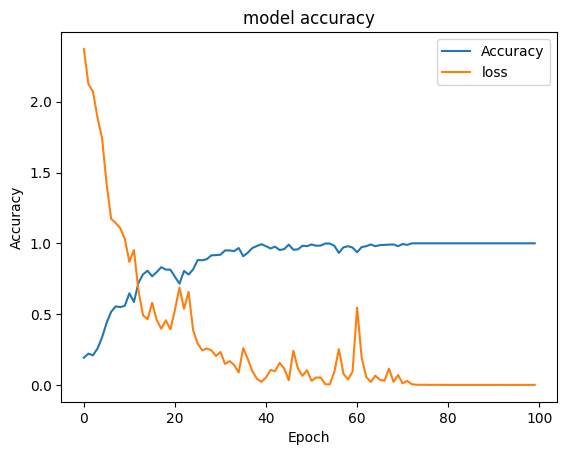

In [30]:
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

Testing the CNN classifier on unseen images

In [27]:
import numpy as np

 
ImagePath='Datasets/Test/face (pre51063).jpg'
test_image=image.load_img(ImagePath,target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image,verbose=0)
print(traindata.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

{'joudi': 0, 'nabeh': 1, 'per4': 2, 'per5': 3, 'per6': 4, 'per7': 5, 'per8': 6, 'qusai': 7, 'souad': 8}
########################################
Prediction is:  per7


In [ ]:
import tensorflow as tf

from keras.models import load_model

#model.save('facefeatures_new_model.h5')